In [16]:
# Notebook for calculating the 
# vibronic spectra
# This program fits potential energy surfaces
# and sets up the necessary DVR calculations
# Notebook is annotated where the DVR calculation must
# be executed before continuing 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [3]:
import scipy

In [4]:
import pandas as pd

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [6]:
from scipy.interpolate import interp1d

In [7]:
from dvr_setup_and_plotting_utils import *

300.0
potential written
dvr is set up


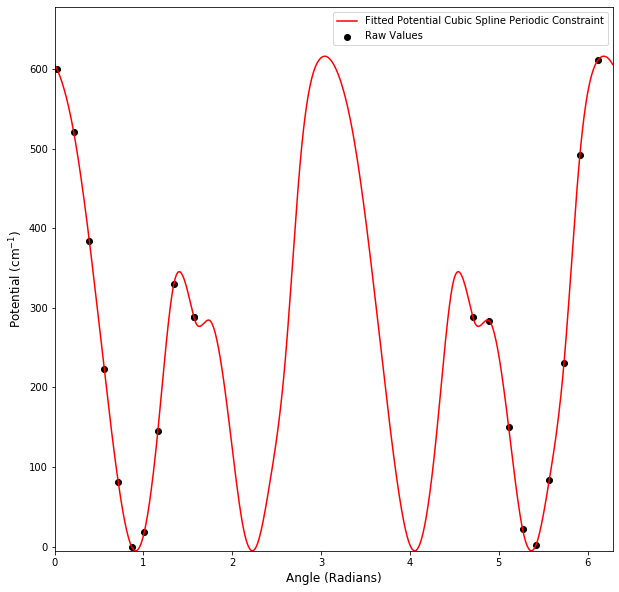

In [45]:
# Run and collect ground state information
# Reduced mass of freqency calculation =  3.5381 AMU

# Final fitted result worked best with the following fitted mass

mass_ground = 1836*300
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500 # This number is N, number of points in DVR is 2N+1

# Linear fit used in production 
# Cubic fit also written 

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_with_water_fitted.dat',
                        output_file_name='gs_scan_with_h2o')

print('dvr is set up')


In [47]:
# At this point in the directory where the files are made
# ! cp gs_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


300.0
potential written
dvr is set up


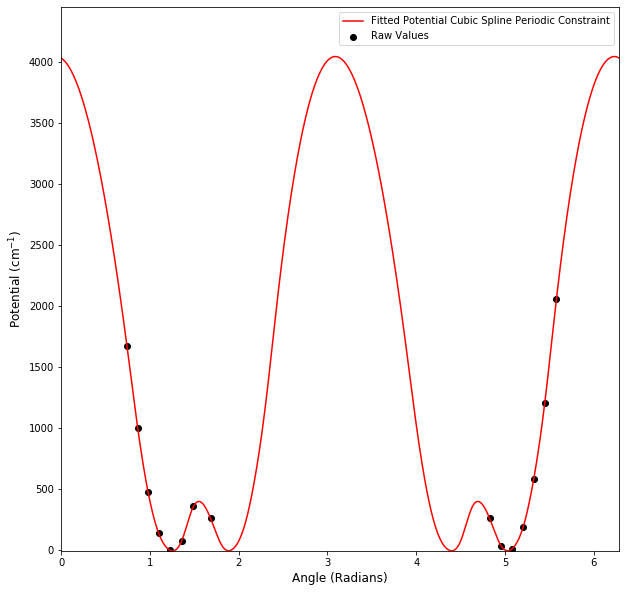

In [48]:
# Now setup and run the excited state excited state

mass_excited =  mass_ground
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_with_water_fitted.dat',
                        output_file_name='es_scan_with_h2o')

print('dvr is set up')

In [49]:
# At this point in the directory where the files are made
# ! cp es_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above


In [50]:
# Square overlaps calculated here

In [74]:
wavefunction_overlaps = calculate_overlaps_multiple_vib_shifts(
                                         ground_state_file_name_root='gs_scan_with_h2o',
                                         excited_state_file_name_root='es_scan_with_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=650,vib_shifts=[130.0,170.0],
                                        vib_scales=[3.0,1.0])

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 2.449399805549182e-06
Calculating overlap for transition with energy 1.096153483457862
Calculating overlap for transition with energy 1.0961556720471899
Calculating overlap for transition with energy 72.91009226400934
Calculating overlap for transition with energy 72.91009365295105
Calculating overlap for transition with energy 74.56699295047234
Calculating overlap for transition with energy 74.56699459572796
Calculating overlap for transition with energy 147.48433309093573
Calculating overlap for transition with energy 147.4843341112283
Calculating overlap for transition with energy 147.6741947855942
Calculating overlap for transition with energy 147.67419562998276
Calculating overlap for transition with energy 218.82519403058586
Calculating overlap for transition with energy 218.82519453678202
Calculating overlap for transition with energy 221.74185314137014
Calculating overlap for trans

Calculating overlap for transition with energy 572.9508951710791
Calculating overlap for transition with energy 613.0849564271454
Calculating overlap for transition with energy 613.0849600555624


In [75]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_with_h2o_0',
 'excited_state_id': 'es_scan_with_h2o_0',
 'overlap': 2.4929540994997306e-13}

In [76]:
# Turn list of dictionaries into a dataframe
overlap_df = pd.DataFrame(wavefunction_overlaps)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual 

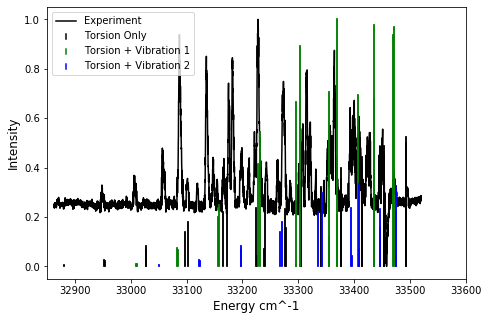

In [77]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum
# Use same color scheme as experimental section

# Exp files: PhPyH2O UV Spectrum.txt
# Exp file 2: PhPyH2O UV Spectrum.txt 

# Offset slightly different if ZPE effects included or not 

offset = 32880

kidwell_uv_spectrum_energy = np.loadtxt('2PhPy-H2O UV Spectrum.txt',usecols=1)
kidwell_uv_spectrum_intensity = np.loadtxt('2PhPy-H2O UV Spectrum.txt',usecols=0)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 


ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
ax.set_xlim(32850,33600)
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_0_for_plotting = list()
wavefunction_excited_vib_state_1_for_plotting = list()


# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited_0' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_0_for_plotting.append(wavefunction_overlap)
    elif 'vib_excited_1' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_1_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)



wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_0_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_0_for_plotting)

wavefunction_excited_vib_state_1_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_1_for_plotting)


# normalize heights 
max_ground_state_height = max(wavefunction_ground_vib_state_for_plotting_df['overlap'])
max_vib_0_excited_state_height = max(wavefunction_excited_vib_state_0_for_plotting_df['overlap'])
max_vib_1_excited_state_height = max(wavefunction_excited_vib_state_1_for_plotting_df['overlap'])

max_height = max(max_ground_state_height,max_vib_0_excited_state_height,max_vib_1_excited_state_height)


#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap']/max_height,linefmt='k-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_0_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_0_for_plotting_df['overlap']/max_height,linefmt='g-',markerfmt=' ',label='Torsion + Vibration 1',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_1_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_1_for_plotting_df['overlap']/max_height,linefmt='b-',markerfmt=' ',label='Torsion + Vibration 2',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_stick_multiple_vib.pdf')
plt.show()

In [78]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    # normalize the height of the intensities for visualization
    
    intensities = intensities/max(intensities)
    
    return frequencies,intensities


In [79]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-50,max_freq=33450,width=4.0,resolution=0.5)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:83: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:93: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual 

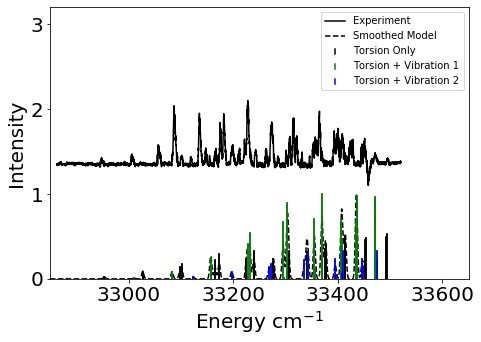

In [81]:
# Plot with both spectra on each other

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('2PhPy-H2O UV Spectrum.txt',usecols=1)
kidwell_uv_spectrum_intensity = np.loadtxt('2PhPy-H2O UV Spectrum.txt',usecols=0)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_ylim(0.0,3.2)

ax.set_xlim(32850,33650)

max_freq = 34000
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+1.1,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_0_for_plotting = list()
wavefunction_excited_vib_state_1_for_plotting = list()


# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited_0' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_0_for_plotting.append(wavefunction_overlap)
    elif 'vib_excited_1' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_1_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)



wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_0_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_0_for_plotting)

wavefunction_excited_vib_state_1_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_1_for_plotting)

# Normalize impulses
max_ground_state_height = max(wavefunction_ground_vib_state_for_plotting_df['overlap'])
max_vib_0_excited_state_height = max(wavefunction_excited_vib_state_0_for_plotting_df['overlap'])
max_vib_1_excited_state_height = max(wavefunction_excited_vib_state_1_for_plotting_df['overlap'])

max_height = max(max_ground_state_height,max_vib_0_excited_state_height,max_vib_1_excited_state_height)



#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap']/max_height,linefmt='k-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_0_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_0_for_plotting_df['overlap']/max_height,linefmt='g-',markerfmt=' ',label='Torsion + Vibration 1',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_1_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_1_for_plotting_df['overlap']/max_height,linefmt='b-',markerfmt=' ',label='Torsion + Vibration 2',
       basefmt=" ")



ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_and_stick_multiple_vib.pdf',bbox_inches='tight')
plt.show()



In [82]:
# Generate plots of the wavefunctions
# or squares of the wavefunctions
ground_state_file_name_root='gs_scan_with_h2o'
excited_state_file_name_root='es_scan_with_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [83]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_with_h2o_0


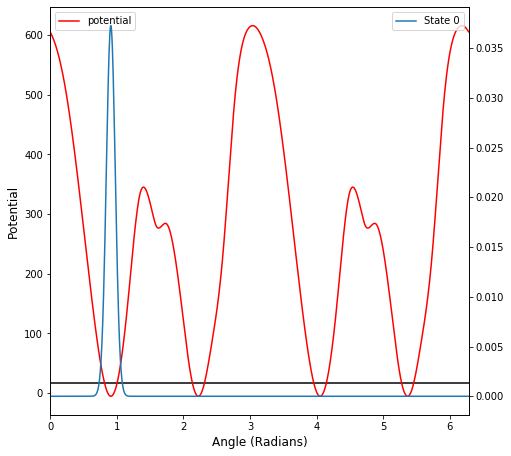

Examining state gs_scan_with_h2o_1


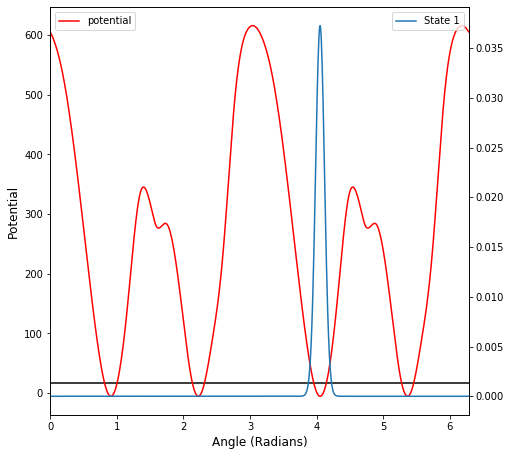

Examining state gs_scan_with_h2o_2


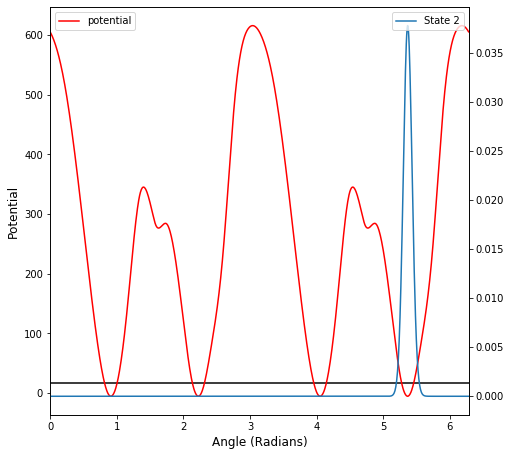

Examining state gs_scan_with_h2o_3


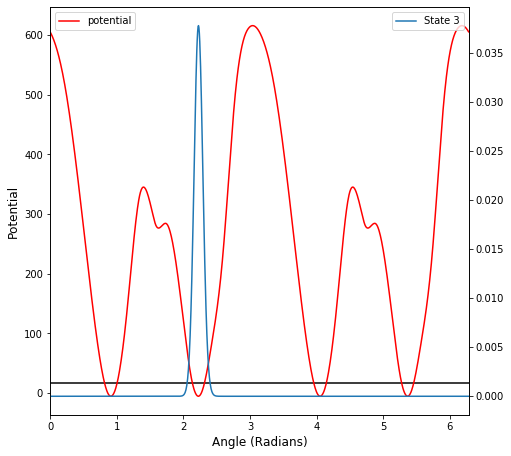

In [84]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential


wavefunction_counter = 0

max_wavefunctions = 4

prefix = "kidwell_gs_scan_with_h2o"

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_with_h2o_",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

Examining state es_scan_with_h2o_0


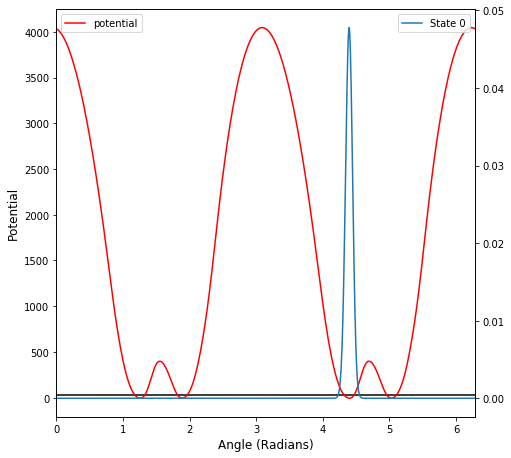

In [85]:
# Excited state square plot

excited_state_plot_list = [0]

for state in excited_state_plot_list:
    plot_wavefunction_squared(state_dict=excited_state_dict,
                        state_num=state,prefix="es_scan_with_h2o_",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground)


In [86]:
# Get maximum overlaps to plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(20)

,energy,ground_state_id,excited_state_id,overlap
166,0.002232,gs_scan_with_h2o_1_vib_excited_0,es_scan_with_h2o_23_vib_excited_0,0.097794
67,0.002232,gs_scan_with_h2o_0_vib_excited_0,es_scan_with_h2o_22_vib_excited_0,0.097794
178,0.002532,gs_scan_with_h2o_1_vib_excited_0,es_scan_with_h2o_27_vib_excited_0,0.095569
79,0.002532,gs_scan_with_h2o_0_vib_excited_0,es_scan_with_h2o_26_vib_excited_0,0.095569
183,0.002693,gs_scan_with_h2o_1_vib_excited_0,es_scan_with_h2o_29_vib_excited_0,0.094620
85,0.002693,gs_scan_with_h2o_0_vib_excited_0,es_scan_with_h2o_28_vib_excited_0,0.094620
373,0.002689,gs_scan_with_h2o_3_vib_excited_0,es_scan_with_h2o_28_vib_excited_0,0.091446
279,0.002689,gs_scan_with_h2o_2_vib_excited_0,es_scan_with_h2o_29_vib_excited_0,0.091446
154,0.001929,gs_scan_with_h2o_1_vib_excited_0,es_scan_with_h2o_19_vib_excited_0,0.087086
55,0.001929,gs_scan_with_h2o_0_vib_excited_0,es_scan_with_h2o_18_vib_excited_0,0.087086


In [87]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_h2o_overlap_square_list.csv')

In [88]:
# plot potentials with energy levels

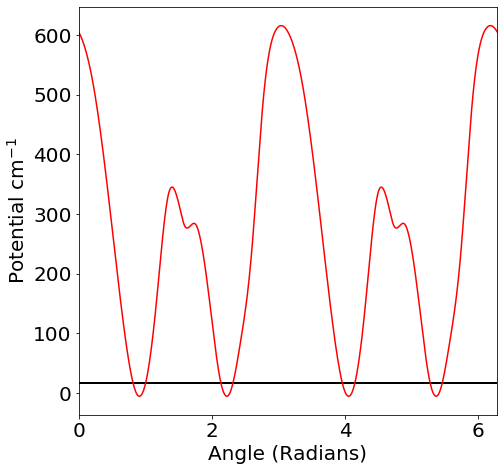

In [89]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="kidwell_gs_scan_with_h2o",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=70)

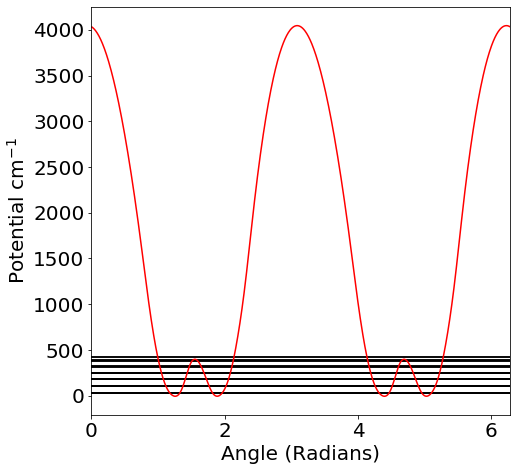

In [90]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="kidwell_es_scan_with_h2o",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=450)